## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [91]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [92]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [94]:
df['user_id'].nunique()


290584

d. The proportion of users converted.

In [95]:
len(df.loc[(df['converted'] == 1)])

35237

In [96]:
users_converted = (len(df.loc[(df['converted'] == 1)])) / df['user_id'].nunique()
print(users_converted)

0.12126269856564711


e. The number of times the `new_page` and `treatment` don't line up.

In [97]:
df.groupby(['group', 'landing_page']).count()



user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

f. Do any of the rows have missing values?

In [98]:
(df[(df.group == 'treatment') &  (df.landing_page == 'old_page')].shape[0]) + (df[(df.group == 'control') &  (df.landing_page == 'new_page')].shape[0])


3893

In [99]:
def num_missing(x):
  return sum(x.isnull())
#Aplica por coluna:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0))

#Aplica por linha:
print ("\nMissing values per row:")
print (df.apply(num_missing, axis=1).head())

Missing values per column:
user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [126]:
drop_i = df[( (df.group == 'treatment') &  (df.landing_page == 'old_page') ) | ( (df.group == 'control') & (df.landing_page == 'new_page') ) ].index

df2 = df.drop(drop_i)



In [127]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [129]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [130]:
sum(df2['user_id'].duplicated())

1

c. What is the row information for the repeat **user_id**? 

In [131]:
df2.loc[df2['user_id'].duplicated()] 

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [132]:
df2.drop([2893], inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [133]:
sum(df2['user_id'].duplicated())

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [134]:
users_converted2 = (len(df2.loc[(df2['converted'] == 1)])) / len(df2)
print(users_converted2)

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [135]:
ccg =  df2[df2['group'] == 'control'].converted.mean()
print(ccg)

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [136]:
ctg =  df2[df2['group'] == 'treatment'].converted.mean()
print(ctg)

0.11880806551510564


d. What is the probability that an individual received the new page?

In [137]:
cnp = df2[df2.landing_page == 'new_page'].user_id.count()
pnp = cnp/df2.shape[0]
print (pnp)

0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Conforme os resultados obtidos até este momento, não é possível afirmar que a nova página levaria a mais conversões, uma vez que a probabilidade de conversões de ambas as páginas é bem parecido por ora ( 0.120 e 0.118) .**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Acredito que, com base nos dados fornecidos até aqui, definiria como hipótese nula HO: pnew<=pold (que a probabilidade de conversão de um usuário em relação à página nova é menor ou igual à probabilidade de conversão de um usuário que recebe a página antiga) e como hipótese alternativa H1: pnew>pold (que a probabilidade de conversão de um usuário em relação à página nova é maior que a probabilidade de conversão de um usuário que recebe a página antiga).**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [138]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [139]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [140]:
n_new = df2[df2.landing_page == 'new_page'].user_id.count()
n_new

145310

d. What is $n_{old}$?

In [141]:
n_old = df2[df2.landing_page == 'old_page'].user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [142]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1-p_new), p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [143]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1-p_old), p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [144]:
new_page_converted.mean() - old_page_converted.mean()

0.0008032507253489113

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [145]:
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation
p_diffs = np.array(p_diffs)
old_converted_simulation.mean(), new_converted_simulation.mean()

(0.1196001445544282, 0.11959811299979356)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [146]:
obs_diff = ctg - ccg

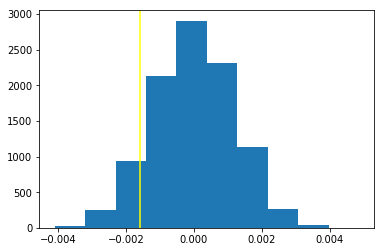

In [147]:
plt.hist(p_diffs);
plt.axvline(obs_diff, color='yellow');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [148]:
(p_diffs > obs_diff).mean()

0.9061

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Na questão j foi realizado o cálculo para observação do P-value. O P-value é uma medida quantitativa para alimentar o processo de tomada de decisão como evidência. Considerando que o P- value obtido foi de 0.906,  o resultado indica que deixa-se de rejeitar a hipótese nula.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [149]:
import statsmodels.api as sm

convert_old = df2[df2['group'] == 'control'].converted.sum()
convert_new = df2[df2['group'] == 'treatment'].converted.sum()
n_old = df2[df2['group'] == 'control'].converted.size
n_new = df2[df2['group'] == 'treatment'].converted.size

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [150]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new
], [n_old, n_new], value=None, alternative='smaller', prop_var=False)
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**O P-value é uma medida quantitativa para alimentar o processo de tomada de decisão como evidência, já o z-score é o número de desvios padrão acima ou abaixo da média da população. Assim, a partir dos valores obtidos como z-score 1.31, que está fora das medidas(menores que -1,96 ou superiores a 1,96) consideradas incomuns e interessantes, e de P-value 0.906 que é maior que o valor alfa, mantém-se a decisão que deixa de rejeitar a hipótese nula, ou seja, a estatística das conversões da página antiga é melhor.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Acredito que nesse caso devemos usar a regressão logística. Esse modelo permite a predição de valores tomados por uma variável categórica, frequentemente binária, e no nosso problema temos dois apenas resultados possíveis conversão ou não.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [173]:
df2['intercept'] = 1
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2.sample(10)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page
245992,795383,2017-01-06 14:46:13.514064,control,old_page,0,1,0,1,1,0
14778,865251,2017-01-08 04:16:47.241323,control,old_page,0,1,0,1,1,0
250546,711457,2017-01-08 22:40:27.854999,control,old_page,1,1,0,1,1,0
258233,814451,2017-01-13 10:35:08.497257,treatment,new_page,0,1,1,0,0,1
211833,822644,2017-01-14 20:03:41.475243,treatment,new_page,0,1,1,0,0,1
99349,776867,2017-01-07 07:06:22.850292,treatment,new_page,0,1,1,0,0,1
32991,731569,2017-01-15 06:51:13.822031,control,old_page,0,1,0,1,1,0
232141,677614,2017-01-04 00:58:43.505644,control,old_page,0,1,0,1,1,0
103777,649810,2017-01-13 07:49:48.110029,treatment,new_page,1,1,1,0,0,1
34194,786655,2017-01-09 06:59:43.331372,treatment,new_page,1,1,1,0,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [174]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Apr 2019   Pseudo R-squ.:               8.077e-06
Time:                        15:10:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**O P-value associado à ab_page é de 0.190. O resultado é diferente nas duas abordagens porque as formas de aplicação são diferentes, ou seja, na Parte 3 é um teste de dois lados e na Parte 2 foi um teste unilateral. Na parte 2  temos como hipótese nula que a probabilidade de conversão de um usuário em relação à página nova é menor ou igual à probabilidade de conversão de um usuário que recebe a página antiga e como hipótese alternativa que a probabilidade de conversão de um usuário em relação à página nova é maior que a probabilidade de conversão de um usuário que recebe a página antiga. Na parte 3 tem-se como hipótese nula HO: pnew=pold e alternativa H1: pnew!=pold ("duas caudas" da distribuição de probabilidade).<br />
A regressão logística é um teste bicaudal, assim, os valores  "P value" tentam mostrar se a  variável é estatisticamente significativa em relação à variável resposta, sendo que nos testes em questão os valores de p estão diferentes devido a componente direcional da hipótese alternativa anterior.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adicionar outros fatores no modelo pode contribuir para uma melhor previsão e levar a uma melhor compreensão do problema. Contudo, existem alguns riscos como a própria interpretação errônea do resultado e também a colinearidade (as variáveis se correlacionando umas com as outras) o que pode ocasionar a perda de significância pelo preditor ou mostrar coeficientes invertidos.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [196]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.sample(10)

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page
user_id,,,,,,,,,,
696632,US,2017-01-02 23:16:38.087914,treatment,new_page,0,1,1,0,0,1
904082,US,2017-01-04 18:13:30.550931,control,old_page,1,1,0,1,1,0
864856,US,2017-01-09 14:47:35.645154,control,old_page,0,1,0,1,1,0
749267,UK,2017-01-17 11:23:48.777086,control,old_page,0,1,0,1,1,0
752129,US,2017-01-14 18:54:35.821754,treatment,new_page,1,1,1,0,0,1
673067,US,2017-01-22 04:16:19.801944,control,old_page,0,1,0,1,1,0
698483,UK,2017-01-03 02:27:47.016010,control,old_page,0,1,0,1,1,0
877914,US,2017-01-16 22:25:30.238735,treatment,new_page,0,1,1,0,0,1
754376,US,2017-01-03 12:15:27.043809,control,old_page,0,1,0,1,1,0


In [197]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [198]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [199]:
### Fit Your Linear Model And Obtain the Results
logit_mod_new = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
results_new = logit_mod_new.fit()
results_new.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Apr 2019   Pseudo R-squ.:               1.521e-05
Time:                        15:21:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [200]:
1/np.exp(-0.0408), np.exp(0.0099)

(1.0416437559600236, 1.0099491671175422)

**Com base nos resultados, pode-se inferir que comparando com as conversões dos Estados Unidos (variável que não foi incluída nessa  regressão): O Canadá possui 1,041 menor probabilidade de converter e o Reino Unido possui 1.009 maior probabilidade de conversão. <br />
Diante disso, pode-se inferir que as conversões do Canadá em geral são mais baixas, e no Reino Unido, em geral o número das conversões é maior. <br />
Pode-se concluir que há diferenças no número de conversões em relação aos países, mas que essas diferenças encontradas nos resultados são pequenas.**

In [201]:
df_new['new_page_CA'] = df_new['ab_page']*df_new['CA']
df_new['new_page_UK'] = df_new['ab_page']*df_new['UK']
df_new['new_page_US'] = df_new['ab_page']*df_new['US']

In [202]:
df_new.sample(10)

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page,CA,UK,US,new_page_CA,new_page_UK,new_page_US
user_id,,,,,,,,,,,,,,,,
714373,UK,2017-01-04 10:17:54.182294,treatment,new_page,0,1,1,0,0,1,0,1,0,0,1,0
718417,US,2017-01-17 22:59:17.580352,control,old_page,0,1,0,1,1,0,0,0,1,0,0,0
673119,US,2017-01-18 07:44:34.512139,control,old_page,0,1,0,1,1,0,0,0,1,0,0,0
766525,UK,2017-01-09 14:42:59.872429,control,old_page,0,1,0,1,1,0,0,1,0,0,0,0
942491,US,2017-01-03 04:37:32.270565,treatment,new_page,0,1,1,0,0,1,0,0,1,0,0,1
705415,US,2017-01-10 23:11:57.578601,treatment,new_page,0,1,1,0,0,1,0,0,1,0,0,1
664569,US,2017-01-13 10:47:51.827796,control,old_page,0,1,0,1,1,0,0,0,1,0,0,0
860198,US,2017-01-11 08:24:16.265176,control,old_page,0,1,0,1,1,0,0,0,1,0,0,0
676567,US,2017-01-22 10:53:06.685528,control,old_page,0,1,0,1,1,0,0,0,1,0,0,0


In [203]:
l_mod = sm.OLS(df_new['converted'], df_new[['intercept', 'new_page_CA', 'new_page_UK']])
results = l_mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.477
Date:                Wed, 17 Apr 2019   Prob (F-statistic):             0.0840
Time:                        15:21:11   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.1196      0.001    183.238      0.000       0.118       0.121
new_page_CA    -0.0077      0.004     -1.996      0.046      -0.015      -0.000
new_page_UK     0.0016      0.002      0.862      0.388      -0.002       0.005
==============================================================================
Omnibus:                   125551.115   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.332
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         6.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
1/np.exp(-0.0077), np.exp(0.0016)

(1.00772972123553, 1.0016012806829397)

**Com base nos resultados daqueles que receberam a nova página, pode-se inferir que comparando com as conversões dos Estados Unidos: O Canadá possui 1,007 menor probabilidade de converter e o Reino Unido possui 1.001 maior probabilidade de conversão.
Diante disso, pode-se inferir que as conversões do Canadá em geral e para a nova página são mais baixas, e no Reino Unido, em geral e na nova página conversões é maior.<br />
Alguns fatores podem influenciar nessas respostas por exemplo, aversão a mudanças ou, do contrário, interesse em algo novo, entre outras. <br />
Cabe ressaltar que as diferenças observadas nos resultados permanecem pequenas.**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.